# Семинар 5. Практика. Решающие деревья

## Разделяющие поверхности

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris()

In [3]:
print iris.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [4]:
pair = (0, 1)
X = iris.data[:, pair]
y = iris.target

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n_classes = 3
plot_colors = "bry"
plot_step = 0.02


def plot_surface(clf):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


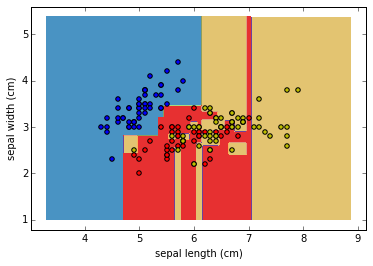

In [6]:
clf = DecisionTreeClassifier().fit(X, y)
plot_surface(clf)

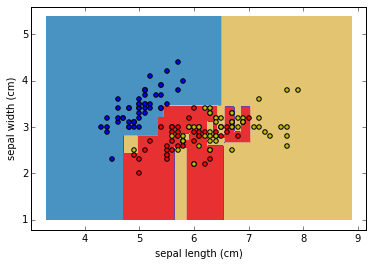

In [7]:
clf = DecisionTreeClassifier().fit(X[:120, :], y[:120])
plot_surface(clf)

## Регрессия с помощью деревьев

In [8]:
from sklearn.datasets import load_boston

In [9]:
data = load_boston()
print data.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [10]:
X_full = data.data
y_full = data.target

In [11]:
X_full.shape

(506, 13)

In [12]:
y_full[:10]

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,  18.9])

In [13]:
from sklearn.cross_validation import train_test_split
X, X_test, y, y_test = train_test_split(X_full, y_full, test_size=100, 
                                        random_state=241)

In [14]:
from sklearn.cross_validation import KFold, cross_val_score
cv = KFold(X.shape[0], shuffle=True, random_state=241)

In [15]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(random_state=241)
print -cross_val_score(regr, X, y, cv=cv, 
                       scoring='mean_squared_error').mean()

24.4502234931


In [18]:
regr.fit(X, y)
regr.tree_

In [19]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(random_state=241)
print cross_val_score(regr, X, y, cv=cv, 
                       scoring='r2').mean()

0.705238866424


In [20]:
from sklearn.grid_search import GridSearchCV
gs = GridSearchCV(DecisionTreeRegressor(random_state=241),
                  param_grid={'max_features': [None, 'log2', 'sqrt'], 
                              'max_depth': [2, 4, 6, 8, 10, 20, 50]},
                  cv=cv,
                  scoring='r2')
gs.fit(X, y)
gs.grid_scores_

[mean: 0.60310, std: 0.07101, params: {'max_features': None, 'max_depth': 2},
 mean: 0.42140, std: 0.06060, params: {'max_features': 'log2', 'max_depth': 2},
 mean: 0.42140, std: 0.06060, params: {'max_features': 'sqrt', 'max_depth': 2},
 mean: 0.73879, std: 0.11251, params: {'max_features': None, 'max_depth': 4},
 mean: 0.38099, std: 0.12633, params: {'max_features': 'log2', 'max_depth': 4},
 mean: 0.38099, std: 0.12633, params: {'max_features': 'sqrt', 'max_depth': 4},
 mean: 0.76242, std: 0.03348, params: {'max_features': None, 'max_depth': 6},
 mean: 0.51970, std: 0.05065, params: {'max_features': 'log2', 'max_depth': 6},
 mean: 0.51970, std: 0.05065, params: {'max_features': 'sqrt', 'max_depth': 6},
 mean: 0.73660, std: 0.00573, params: {'max_features': None, 'max_depth': 8},
 mean: 0.59787, std: 0.05413, params: {'max_features': 'log2', 'max_depth': 8},
 mean: 0.59787, std: 0.05413, params: {'max_features': 'sqrt', 'max_depth': 8},
 mean: 0.72800, std: 0.00374, params: {'max_feat

In [21]:
from sklearn.grid_search import GridSearchCV
gs = GridSearchCV(DecisionTreeRegressor(random_state=241),
                  param_grid={'max_features': [None, 'log2', 'sqrt'],
                              'max_depth': [2, 4, 6, 8, 10, 20, 50], 
                              'min_samples_leaf': range(1, 20)},
                  cv=cv,
                  scoring='r2')
gs.fit(X, y)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=406, n_folds=3, shuffle=True, random_state=241),
       error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=241,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': [None, 'log2', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10, 20, 50], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)

In [22]:
gs.best_score_

0.775856892150106

In [23]:
for z in gs.grid_scores_:
    if z.mean_validation_score == gs.best_score_:
        print z

mean: 0.77586, std: 0.03204, params: {'max_features': None, 'max_depth': 6, 'min_samples_leaf': 2}


## Решающие леса

In [24]:
regr = DecisionTreeRegressor()
print cross_val_score(regr, X, y, cv=cv,
                       scoring='r2').mean()

0.730458978863


In [25]:
regr = DecisionTreeRegressor()
print cross_val_score(regr, X, y, cv=cv,
                       scoring='r2').mean()

0.734972717894


In [26]:
from sklearn.ensemble import BaggingRegressor

In [27]:
regr = BaggingRegressor(DecisionTreeRegressor(), n_estimators=10,
                        bootstrap=False, random_state=241)
print cross_val_score(regr, X, y, cv=cv,
                       scoring='r2').mean()

0.744495766448


In [28]:
regr = BaggingRegressor(DecisionTreeRegressor(), n_estimators=10,
                        bootstrap=False, random_state=241, max_samples=0.5)
print cross_val_score(regr, X, y, cv=cv,
                       scoring='r2').mean()

0.805541688419


In [29]:
regr = BaggingRegressor(DecisionTreeRegressor(), n_estimators=100,
                        bootstrap=False, random_state=241, max_samples=0.5)
print cross_val_score(regr, X, y, cv=cv,
                       scoring='r2').mean()

0.83885573889


In [30]:
regr = BaggingRegressor(DecisionTreeRegressor(), n_estimators=1000,
                        bootstrap=False, random_state=241, max_samples=0.5)
print cross_val_score(regr, X, y, cv=cv,
                       scoring='r2').mean()

0.839208296696


In [32]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=10)
print cross_val_score(regr, X, y, cv=cv,
                       scoring='r2').mean()

0.839403189711


In [36]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=100)
print cross_val_score(regr, X, y, cv=cv,
                       scoring='r2').mean()

0.846289849392


In [33]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=300)
print cross_val_score(regr, X, y, cv=cv,
                       scoring='r2').mean()

0.848259598419


In [34]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=500)
print cross_val_score(regr, X, y, cv=cv,
                       scoring='r2').mean()

0.847760466833


In [35]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=1000)
print cross_val_score(regr, X, y, cv=cv,
                       scoring='r2').mean()

0.847839647812
